* https://www.youtube.com/watch?v=0B5eIE_1vpU

In [17]:
from sklearn.datasets import load_boston

print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1]:
X, y = load_boston(return_X_y=True)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

mod1 = LinearRegression().fit(X, y)
mod2 = KNeighborsRegressor().fit(X, y)
p1 = mod1.predict(X)
p2 = mod1.predict(X)

Text(0, 0.5, 'y')

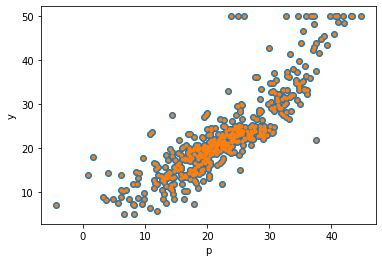

In [9]:
import matplotlib.pyplot as pl

pl.plot(p1, y, 'o', label='mod1')
pl.plot(p2, y, '.', label='mod2')
pl.xlabel('p')
pl.ylabel('y')

## pipeline

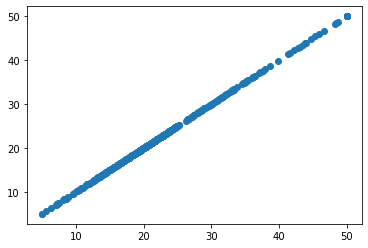

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
p = pipe.fit(X, y).predict(X)
pl.scatter(p, y)

In [12]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [13]:
from sklearn.model_selection import GridSearchCV

mod = GridSearchCV(estimator=pipe,
                   param_grid={
                       'model__n_neighbors': [1,2,3,4,5]
                       
                   },
                   cv=3
)
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5]})

In [15]:
import pandas as pd

df=pd.DataFrame(mod.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001022,0.000101,0.001343,0.000108,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,5
1,0.000840,0.000038,0.001354,0.000162,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,4
2,0.000856,0.000042,0.001384,0.000035,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000797,0.000008,0.001366,0.000094,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,2
4,0.000838,0.000009,0.001420,0.000076,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,3


## transform

(100, 1)

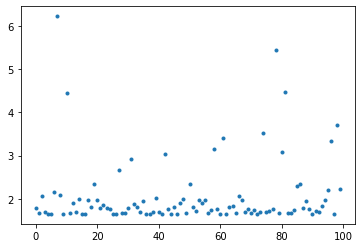

In [43]:
import numpy as np

X = np.random.rand(100)
X = np.c_[X**2 + np.sqrt(1/X)]  #np.atleast_2d(X).T
pl.plot(X, '.')
X.shape

/home/jerome/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


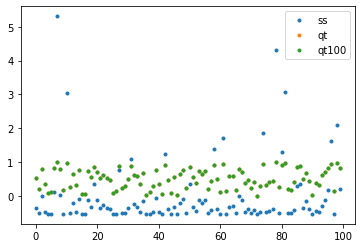

In [46]:
from sklearn.preprocessing import QuantileTransformer

X1 = StandardScaler().fit_transform(X)
X2 = QuantileTransformer().fit_transform(X)
X3 = QuantileTransformer(n_quantiles=100).fit_transform(X)

pl.plot(X1, '.', label='ss')
pl.plot(X2, '.', label='qt')
pl.plot(X3, '.', label='qt100')
pl.legend()

## data
* https://drawdata.xyz/

In [48]:
d = pd.read_clipboard(sep=",")
d

,x,y,z
0,106.782446,435.008385,a
1,110.144904,405.057295,a
2,143.645950,427.624434,a
3,88.081516,353.193919,a
4,72.181487,396.674808,a
...,...,...,...
209,568.258373,423.970616,c
210,576.481802,415.568043,c
211,512.613138,462.397560,c
212,540.089139,412.470701,c
